In [ ]:
try:
    %tensorflow_version 2.x
    COLAB = True
    print("Note: using Google CoLab")
except:
    print("Note: not using Google CoLab")
    COLAB = False

Note: using Google CoLab


In [ ]:
# import libray functions

import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, LSTM,Bidirectional,Activation
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
%matplotlib inline

import os

In [ ]:
url='https://raw.githubusercontent.com/niloytanvir/heart-failure-data/main/Data/heart_failure_clinical_records_dataset.csv'
data = pd.read_csv(url)

In [ ]:
x = data.iloc[:,:-1].values
y = data['DEATH_EVENT']

In [ ]:
x = x.reshape(x.shape[0], x.shape[1], 1)

In [ ]:
xtrain, a, ytrain, b=train_test_split(x, y, test_size=0.20, random_state=101)

In [ ]:
xtest,xpred,ytest,ypred=train_test_split(a, b, test_size=0.15, random_state=101)

In [ ]:
# F1 Score custom metrics
from keras import backend as K
def f1_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)



In [ ]:
layer = keras.layers.Dense(3)
layer.build((None, 12,1))  # Create the weights

layer.trainable = False


model = Sequential()
model.add(layer)
model.add(layers.LSTM(32))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam',metrics = ['accuracy',f1_score,tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, 
                        verbose=1, mode='auto', restore_best_weights=True)


In [ ]:
gru=model.fit(xtrain,ytrain,validation_data=(xtest,ytest), callbacks=[monitor,cp_callback],verbose=2,epochs=100).history

Epoch 1/100
8/8 - 24s - loss: 0.6146 - accuracy: 0.6611 - f1_score: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.5128 - val_accuracy: 0.8039 - val_f1_score: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00

Epoch 00001: saving model to training_1/cp.ckpt
Epoch 2/100
8/8 - 0s - loss: 0.5847 - accuracy: 0.6778 - f1_score: 0.1081 - precision: 0.3750 - recall: 0.0052 - val_loss: 0.4758 - val_accuracy: 0.8824 - val_f1_score: 0.6222 - val_precision: 1.0000 - val_recall: 0.0387

Epoch 00002: saving model to training_1/cp.ckpt
Epoch 3/100
8/8 - 0s - loss: 0.5614 - accuracy: 0.7197 - f1_score: 0.3246 - precision: 0.9513 - recall: 0.0705 - val_loss: 0.4519 - val_accuracy: 0.9020 - val_f1_score: 0.7000 - val_precision: 0.9062 - val_recall: 0.1068

Epoch 00003: saving model to training_1/cp.ckpt
Epoch 4/100
8/8 - 0s - loss: 0.5410 - accuracy: 0.7741 - f1_score: 0.5208 - precision: 0.8873 - recall: 0.1484 - val_loss: 0.4250 - val_accuracy: 0.9020 - val_f1_sco

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper (ModuleWrappe (None, 12, 3)             6         
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 32)                4608      
_________________________________________________________________
dense (Dense)                (None, 10)                330       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 4,955
Trainable params: 4,949
Non-trainable params: 6
_________________________________________________________________


In [ ]:
layer.trainable = True

model.load_weights(checkpoint_path)

model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(1e-3),metrics = ['accuracy',f1_score,tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])


In [ ]:
TL = model.fit(xtrain,ytrain,validation_data=(xtest,ytest),
          verbose=2,epochs=100).history

Epoch 1/100
8/8 - 3s - loss: 0.4526 - accuracy: 0.8243 - f1_score: 0.6631 - precision_1: 0.8981 - recall_1: 0.5916 - val_loss: 0.3398 - val_accuracy: 0.9020 - val_f1_score: 0.8077 - val_precision_1: 0.8399 - val_recall_1: 0.5865
Epoch 2/100
8/8 - 0s - loss: 0.4505 - accuracy: 0.8285 - f1_score: 0.6111 - precision_1: 0.8528 - recall_1: 0.6153 - val_loss: 0.2990 - val_accuracy: 0.9216 - val_f1_score: 0.8000 - val_precision_1: 0.8612 - val_recall_1: 0.5845
Epoch 3/100
8/8 - 0s - loss: 0.4353 - accuracy: 0.8285 - f1_score: 0.6905 - precision_1: 0.8633 - recall_1: 0.5863 - val_loss: 0.3239 - val_accuracy: 0.9216 - val_f1_score: 0.8333 - val_precision_1: 0.8645 - val_recall_1: 0.5875
Epoch 4/100
8/8 - 0s - loss: 0.4334 - accuracy: 0.8410 - f1_score: 0.7178 - precision_1: 0.8641 - recall_1: 0.5999 - val_loss: 0.3223 - val_accuracy: 0.9216 - val_f1_score: 0.8333 - val_precision_1: 0.8619 - val_recall_1: 0.6028
Epoch 5/100
8/8 - 0s - loss: 0.4301 - accuracy: 0.8285 - f1_score: 0.6792 - precisio

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper (ModuleWrappe (None, 12, 3)             6         
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 32)                4608      
_________________________________________________________________
dense (Dense)                (None, 10)                330       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 4,955
Trainable params: 4,955
Non-trainable params: 0
_________________________________________________________________


In [ ]:
test_pred = model.predict(xtest)

In [ ]:
(test_pred > 0.5).astype("int32")

array([[0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0]], dtype=int32)

In [ ]:
test_fpr , test_tpr, _ = roc_curve(ytest,test_pred)
test_roc_auc = auc(test_fpr, test_tpr)

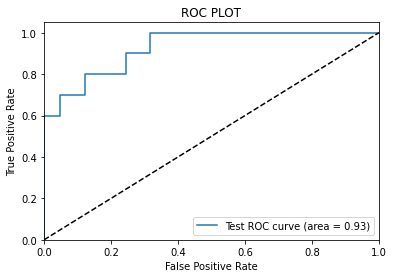

In [ ]:
    plt.figure()
    plt.plot(test_fpr, test_tpr, label='Test ROC curve (area = %0.2f)' % test_roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC PLOT')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
 score = model.evaluate(xpred,  ypred, verbose=2)

1/1 - 0s - loss: 0.2020 - accuracy: 0.8889 - f1_score: 0.9091 - precision_1: 0.7931 - recall_1: 0.7091


In [ ]:
pred = model.predict(xpred)

In [ ]:
(pred > 0.5).astype("int32")

array([[1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0]], dtype=int32)

In [ ]:
ypred

56     0
177    0
48     1
4      1
169    0
19     1
39     1
41     1
280    0
Name: DEATH_EVENT, dtype: int64

In [ ]:
fpr , tpr, _ = roc_curve(ypred,pred)
roc_auc = auc(fpr, tpr)

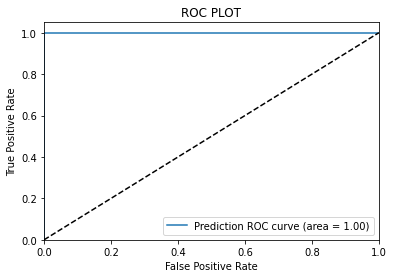

In [ ]:
    plt.figure()
    plt.plot(fpr, tpr, label='Prediction ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC PLOT')
    plt.legend(loc="lower right")
    plt.show()

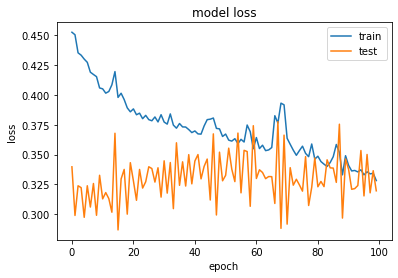

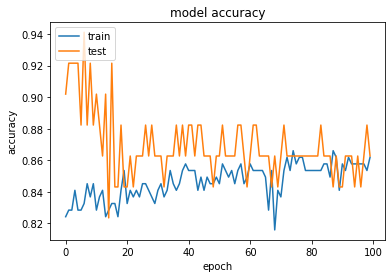

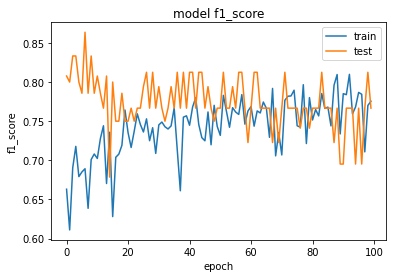

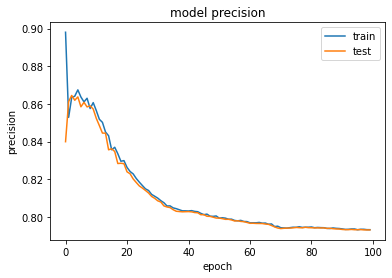

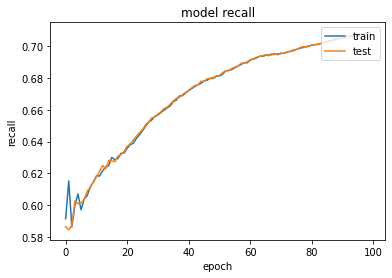

In [ ]:
plt.plot(TL['loss'])
plt.plot(TL['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper right')
plt.show()


plt.plot(TL['accuracy'])
plt.plot(TL['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(TL['f1_score'])
plt.plot(TL['val_f1_score'])
plt.title('model f1_score')
plt.ylabel('f1_score')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper right')
plt.show()


plt.plot(TL['precision_1'])
plt.plot(TL['val_precision_1'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper right')
plt.show()


plt.plot(TL['recall_1'])
plt.plot(TL['val_recall_1'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper right')
plt.show()